Let's look at the GEMS output that I got

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import pandas as pa
import os

In [2]:
files = ['GAIA_GUMS_MW_nside16_832.csv', 'GAIA_GUMS_MW_nside16_834.csv', 
         'GAIA_GUMS_MW_nside16_836.csv', 'GAIA_GUMS_MW_nside16_838.csv',
         'GAIA_GUMS_MW_nside16_833.csv', 'GAIA_GUMS_MW_nside16_835.csv', 
         'GAIA_GUMS_MW_nside16_837.csv', 'GAIA_GUMS_MW_nside16_839.csv']
path = '/Users/yoachim/ulysses/gums'


In [3]:
gums = pa.read_csv(os.path.join(path, files[0]))

In [4]:
for filename in files[1:]:
    temp = pa.read_csv(os.path.join(path, filename))
    gums.append(temp)

In [5]:
gums.keys()

Index([u'sourceExtendedId', u'raj2000', u'dej2000', u'meanAbsoluteV', u'magG', u'magGBp', u'magGRp', u'magGRvs', u'alpha', u'delta', u'distance', u'muAlpha', u'muDelta', u'radialVelocity', u'colorVminusI', u'Av', u'age', u'alphaFe', u'bondAlbedo', u'eccentricity', u'feH', u'flagInteracting', u'geomAlbedo', u'hasPhotocenterMotion', u'host', u'inclination', u'logg', u'longitudeAscendingNode', u'mass', u'mbol', u'nc', u'nt', u'orbitPeriod', u'periastronArgument', u'periastronDate', u'phase', u'population', u'rEnvRStar', u'radius', u'semimajorAxis', u'teff', u'variabilityAmplitude', u'variabilityPeriod', u'variabilityPhase', u'variabilityType', u'vsini'], dtype='object')

In [6]:
gums = gums[['raj2000', 'dej2000', 'magG', 'teff', 'feH', 'logg', 'Av']]


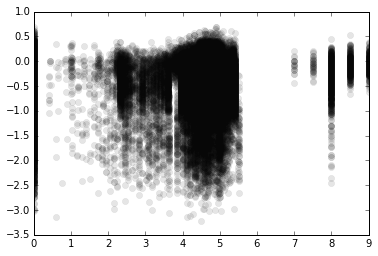

In [7]:
plt.plot(gums['logg'], gums['feH'], 'ko', alpha=.1)

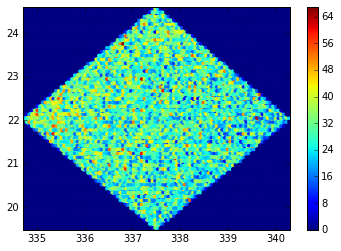

In [8]:
plt.hexbin(gums['raj2000'], gums['dej2000'])
cb = plt.colorbar()

(array([  3.00000000e+00,   3.00000000e+00,   2.00000000e+00,
          3.00000000e+00,   1.70000000e+01,   1.50000000e+01,
          1.80000000e+01,   1.50000000e+01,   2.80000000e+01,
          4.50000000e+01,   5.90000000e+01,   8.20000000e+01,
          1.29000000e+02,   1.72000000e+02,   1.70000000e+02,
          2.24000000e+02,   2.29000000e+02,   2.97000000e+02,
          3.58000000e+02,   5.13000000e+02,   5.19000000e+02,
          7.93000000e+02,   8.82000000e+02,   1.15000000e+03,
          1.53300000e+03,   1.82400000e+03,   2.06000000e+03,
          2.45700000e+03,   2.84700000e+03,   3.34400000e+03,
          3.69300000e+03,   4.22700000e+03,   4.82700000e+03,
          5.73300000e+03,   6.49300000e+03,   7.63200000e+03,
          8.77600000e+03,   1.00240000e+04,   1.14080000e+04,
          1.30080000e+04,   1.43220000e+04,   1.59160000e+04,
          8.68700000e+03,   3.25400000e+03,   2.87800000e+03,
          2.36100000e+03,   2.31300000e+03,   2.21500000e+03,
        

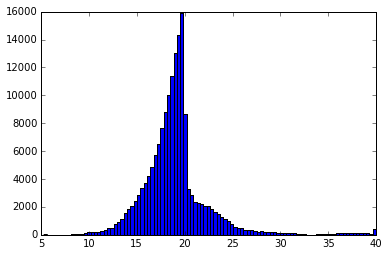

In [9]:
plt.hist(gums['magG'], bins=100)

In [10]:
gums.sort('magG', inplace=True)

In [11]:
indx = np.where((gums['magG'] < 19) & (gums['magG'] > 16) & (gums['teff'] > 0))[0]
gums = gums.iloc[indx]

In [12]:
gums.size

334747

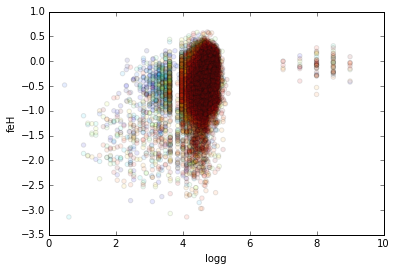

In [16]:
plt.scatter(gums['logg'], gums['feH'], c=gums['magG'], alpha=.1)
plt.xlabel('logg')
plt.ylabel('feH')

In [17]:
# Maybe try a feH step of 0.05, logg step of 0.1, and a teff step of 500? Wait, what are my SED model steps?